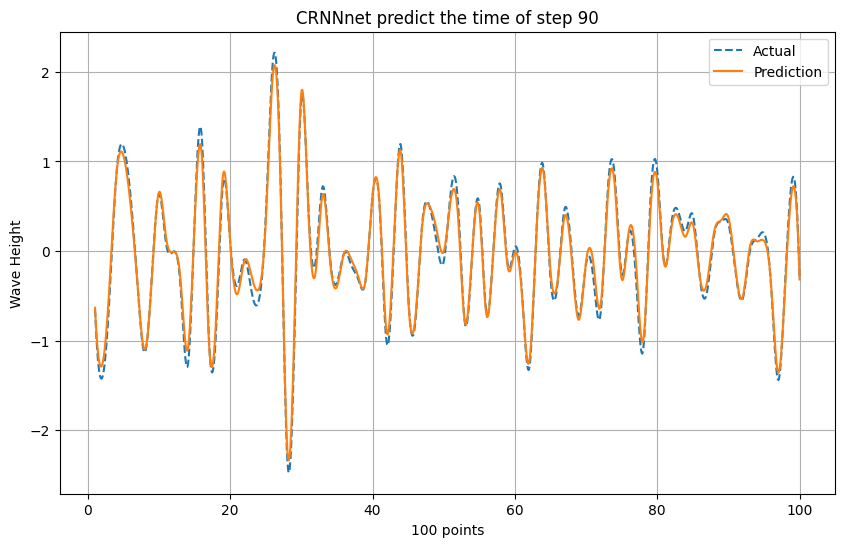

In [9]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
from models.crnn import CRNNnet as CRNNnet
import torch


eta00 = np.load('data/6000_1s_data_eta00.npy')
data = eta00[:,20,100:200]
model = CRNNnet().to('cuda')


    

# 加载预训练的参数
checkpoint = torch.load('checkpoints/CRNNnet_model_parameters_0.001.pth')

# 将参数加载到模型中
model.load_state_dict(checkpoint)

X = data[5700:5730]
X = np.expand_dims(X, axis=0)
X_tensor = torch.Tensor(X).to('cuda').permute(0,2,1)

pre_1 = model(X_tensor)
pre = pre_1.permute(0,2,1)
pre_2 = model(pre)
pre = pre_2.permute(0,2,1)
pre_3 = model(pre)
pre = pre_3.permute(0,2,1)
pre_4 = model(pre)


prediction_array_1 = pre_1.cpu().detach().numpy()
prediction_array_2 = pre_2.cpu().detach().numpy()
prediction_array_3 = pre_3.cpu().detach().numpy()
prediction_array_4 = pre_4.cpu().detach().numpy()


array1 = prediction_array_1[:,6,:].reshape(-1)

array2 = prediction_array_2[:,6,:].reshape(-1)

array3 = prediction_array_3[:,6,:].reshape(-1)

array4 = prediction_array_4[:,6,:].reshape(-1)




# prediction_array = pre.cpu().detach().numpy()
# prediction = array1[:,,:].reshape(-1)

actual = data[5820:5850]
actual = actual[6,:]  

x = np.linspace(1, 100, 100) 
actual = interp1d(x, actual, kind='cubic')
prediction = interp1d(x,array4, kind='cubic')
x_dense = np.linspace(1, 100, 1000)

plt.figure(figsize=(10, 6))
plt.plot(x_dense, actual(x_dense), '--', label='Actual')
plt.plot(x_dense, prediction(x_dense), '-', label='Prediction')
plt.legend()
plt.title(f'CRNNnet predict the time of step {120}')
plt.xlabel('100 points')
plt.ylabel('Wave Height')
plt.grid(True)
plt.savefig('CRNN_0.01_1_120s.png')
plt.show()